In [1]:
from local.lib import prepare_dataset as pre
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
metadata=pre.create_and_read_metadata()

In [3]:
train_sources = pre.build_sources_from_metadata(metadata)
test_sources = pre.build_sources_from_metadata(metadata, mode='test')

In [4]:
test_sources

[('local\\data\\img\\IMG_20200921_142324.jpg',
  (0.4585, 0.6940000000000001, 0.26868905742145177, 0.7036836403033586)),
 ('local\\data\\img\\IMG_20200921_142350.jpg',
  (0.46775, 0.68875, 0.261646803900325, 0.7204767063921993)),
 ('local\\data\\img\\IMG_20200921_142431.jpg',
  (0.51375, 0.7065, 0.4198266522210184, 0.8049837486457205)),
 ('local\\data\\img\\IMG_20200921_142451.jpg',
  (0.47225, 0.665, 0.3445287107258938, 0.7123510292524377)),
 ('local\\data\\img\\IMG_20200921_142505.jpg',
  (0.623, 0.87025, 0.5482123510292525, 0.957204767063922)),
 ('local\\data\\img\\IMG_20200921_142528.jpg',
  (0.64, 0.90525, 0.3900325027085591, 0.8206933911159263)),
 ('local\\data\\img\\IMG_20200921_142539.jpg',
  (0.60525, 0.88225, 0.3131094257854821, 0.8461538461538461)),
 ('local\\data\\img\\IMG_20200921_142617.jpg',
  (0.5395, 0.846, 0.2659804983748646, 0.8347778981581798)),
 ('local\\data\\img\\IMG_20200921_142624.jpg',
  (0.2645, 0.5895, 0.29469122426868904, 0.9333694474539544)),
 ('local\\dat

In [5]:
dataset = pre.make_tf_dataset(train_sources, training=False,
    batch_size=3, num_epochs=1,
    num_parallel_calls=3)
dataset = iter(dataset)


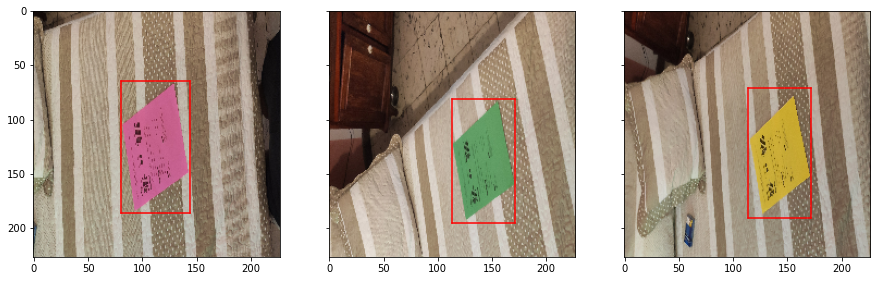

In [6]:
pre.imshow_batch_of_three(next(dataset),show_box=True)

In [7]:
#leNet

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(227,227,3)))
model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

model.add(tf.keras.layers.Dense(units=4, activation = 'sigmoid'))
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(0.0001))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 223, 223, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 111, 111, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 16)      2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 53, 53, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 44944)             0         
_________________________________________________________________
dense (Dense)                (None, 120)               5393400   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [8]:
#create tf dataset for train and test

dataset = pre.make_tf_dataset(train_sources, training=True,
                                batch_size=4, num_epochs=1,
                                num_parallel_calls=2)

testset = pre.make_tf_dataset(test_sources, training=True,
                                batch_size=1, num_epochs=1,
                                num_parallel_calls=2)

In [9]:
#evaluate dataset with the CNN not trained
print(model.evaluate(dataset))

87/87 [==============================] - 11s 130ms/step - loss: 0.1163
0.11632997820945992


In [10]:
#fit model and generate history

h=model.fit(x=dataset, epochs=10,validation_data=testset, validation_steps=1)

Train for 87 steps, validate for 1 steps
Epoch 1/10
87/87 [==============================] - 16s 178ms/step - loss: 0.0264 - val_loss: 0.0296
Epoch 2/10
87/87 [==============================] - 15s 176ms/step - loss: 0.0209 - val_loss: 0.0317
Epoch 3/10
87/87 [==============================] - 15s 170ms/step - loss: 0.0198 - val_loss: 0.0204
Epoch 4/10
87/87 [==============================] - 15s 171ms/step - loss: 0.0144 - val_loss: 0.0102
Epoch 5/10
87/87 [==============================] - 16s 186ms/step - loss: 0.0128 - val_loss: 0.0161
Epoch 6/10
87/87 [==============================] - 17s 200ms/step - loss: 0.0127 - val_loss: 0.0199
Epoch 7/10
87/87 [==============================] - 15s 175ms/step - loss: 0.0124 - val_loss: 0.0205
Epoch 8/10
87/87 [==============================] - 15s 177ms/step - loss: 0.0124 - val_loss: 0.0086
Epoch 9/10
87/87 [==============================] - 16s 182ms/step - loss: 0.0124 - val_loss: 0.0151
Epoch 10/10
87/87 [==============================]

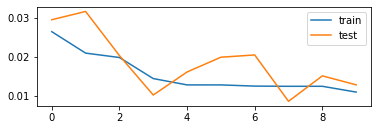

In [11]:
#print scores and losses

plt.subplot(2,1,1)
plt.plot(h.history['loss'],label='train')
plt.plot(h.history['val_loss'],label='test')
plt.legend()



In [12]:
#predict with model

predictions=model.predict(testset)

In [16]:
#generate sources for predictions
prediction_sources=pre.predicts_to_sources(test_sources,predictions)

In [42]:
#create TF dataset for prediction sourses to plot them

dataset = pre.make_tf_dataset(prediction_sources, training=False,
    batch_size=3, num_epochs=1,
    num_parallel_calls=3)
dataset = iter(dataset)


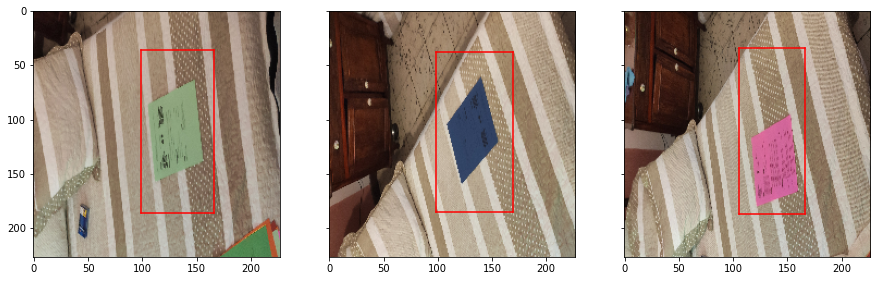

In [43]:
#plot predictions
pre.imshow_batch_of_three(next(dataset),show_box=True)



In [42]:
w=model.predict(testset)
w.tolist()
a,b=zip(*test_sources)
s=[r for r in zip(a,w.tolist())]

In [44]:
dataset = pre.make_tf_dataset(s, training=False,
    batch_size=3, num_epochs=1,
    num_parallel_calls=3)
dataset = iter(dataset)

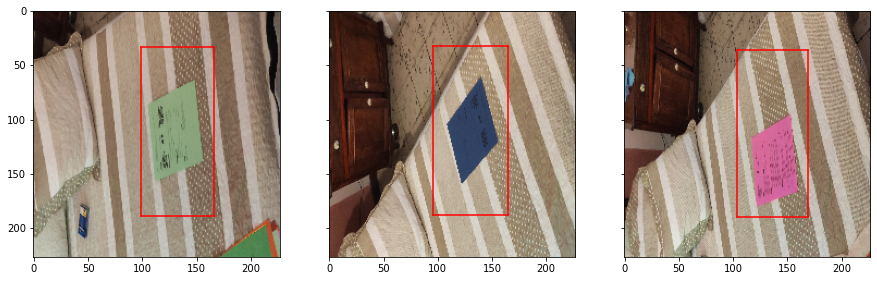

In [45]:
pre.imshow_batch_of_three(next(dataset),show_box=True)